In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('한국복지패널조사_2022년_17차_가구용,가구원용,복지인식설문용_결합.xlsx')
df.head()

,h17_id,h17_ind,h17_sn,h17_merkey,h_new,h_new1,h17_cobf,p17_wsc,p17_wsl,p17_wgc,...,wc17_64,wc17_65,wc17_5aq4,wc17_5aq5,wc17_5aq6,h17_pers_income1,h17_pers_income2,h17_pers_income3,h17_pers_income4,h17_pers_income5
0,2,1,1,20101,0,0,NaN,0.255099,0.255098,1301.779156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,3,1,1,30101,0,0,NaN,0.369345,0.369345,1884.782338,...,NaN,NaN,NaN,NaN,NaN,NaN,2064.0,NaN,0,NaN
2,4,1,1,40101,0,0,NaN,0.228046,0.228400,1163.730163,...,NaN,NaN,NaN,NaN,NaN,NaN,1200.0,NaN,0,NaN
3,6,1,1,60101,0,0,NaN,0.524368,0.534658,2675.871234,...,1.0,.,1.0,3.0,4.0,3216.0,NaN,NaN,0,NaN
4,6,1,1,60101,0,0,NaN,0.851223,0.851223,4343.829280,...,4.0,.,1.0,4.0,3.0,NaN,1680.0,NaN,0,NaN


In [3]:

## 전체에서 뺼거 뺴는거 부터 ㄱㄱ 
data = df.copy()

In [35]:
train = data.loc[:,['p1705_9','p1705_10','p1705_11','p1705_12','p1705_13','p1705_14',                           ## 종속변수 설문
'p1705_15','p1705_16','p1705_17','p1705_18','p1705_19','h17_g3','h17_g4','h17_g11','h17_g6','h17_g7'       
,'p1705_3aq3','p1705_3aq5','p1705_3aq6'
,'p1705_2','p1705_3','p1705_4aq1','p1705_4aq7','p1705_4aq8'
,'p1705_3aq11'
,'h17_hc_n_all'
,'h1705_3','h17_med2'
,'h17_g8'
,'p1702_1'
,'h17_eco9'
,'p1705_4aq2'
,'p1705_4aq3'
,'p1705_4aq4'
,'p1705_4aq5'
,'p1705_4aq6'
,'p1705_4aq7'
,'p1705_4aq8']]
train.head()

,p1705_9,p1705_10,p1705_11,p1705_12,p1705_13,p1705_14,p1705_15,p1705_16,p1705_17,p1705_18,...,h17_g8,p1702_1,h17_eco9,p1705_4aq2,p1705_4aq3,p1705_4aq4,p1705_4aq5,p1705_4aq6,p1705_4aq7,p1705_4aq8
0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,...,0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,...,0,1.0,942.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,...,0,1.0,762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,...,0,1.0,855.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,...,0,1.0,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# train.columns = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11'
# ,'gen','age','rel','edu','edu_rate'
# ,'sm_total','sm_state','sm_mean'

# train = data.loc[:,['p1705_9','p1705_10','p1705_11','p1705_12','p1705_13','p1705_14',                           ## 종속변수 설문
# 'p1705_15','p1705_16','p1705_17','p1705_18','p1705_19','h17_g3','h17_g4','h17_g11','h17_g6','h17_g7'       
# ,'p1705_3aq3','p1705_3aq5','p1705_3aq6'

In [36]:
train.columns = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11'
,'gen','age','rel','edu','edu_rate'
,'sm_total','sm_state','sm_mean'
,'dr_mean_year','dr_cup','dr_six','dr_hurt','dr_worry'
,"preg"
,"income_bal"
,"heal_satis",'heal_state'
,"disabled"
,"work_state"
,"work_code"
,'dr1'
,'dr2'
,'dr3'
,'dr4'
,'dr5'
,'dr6'
,'dr7']
train.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,disabled,work_state,work_code,dr1,dr2,dr3,dr4,dr5,dr6,dr7
0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,...,0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,...,0,1.0,942.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,...,0,1.0,762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,...,0,1.0,855.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,...,0,1.0,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
train.to_excel("한국복지패널찐막데이터.xlsx")

In [132]:
new_df = train.copy()
new_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,disabled,work_state,work_code,dr1,dr2,dr3,dr4,dr5,dr6,dr7
0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,...,0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,...,0,1.0,942.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,...,0,1.0,762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,...,0,1.0,855.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,...,0,1.0,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
new_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,disabled,work_state,work_code,dr1,dr2,dr3,dr4,dr5,dr6,dr7
0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,...,0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,...,0,1.0,942.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,...,0,1.0,762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,...,0,1.0,855.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,...,0,1.0,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16591 entries, 0 to 16590
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            14152 non-null  float64
 1   Q2            14152 non-null  float64
 2   Q3            14152 non-null  float64
 3   Q4            14152 non-null  float64
 4   Q5            14152 non-null  float64
 5   Q6            14152 non-null  float64
 6   Q7            14152 non-null  float64
 7   Q8            14152 non-null  float64
 8   Q9            14152 non-null  float64
 9   Q10           14152 non-null  float64
 10  Q11           14152 non-null  float64
 11  gen           16591 non-null  int64  
 12  age           16591 non-null  int64  
 13  rel           16591 non-null  int64  
 14  edu           16591 non-null  int64  
 15  edu_rate      16591 non-null  int64  
 16  sm_total      1241 non-null   float64
 17  sm_state      14152 non-null  float64
 18  sm_mean       2197 non-nul

In [135]:
## 우울감 정도 점수 만들기 
### Q1~Q11 까지 점수 더하면 됌

# new_df[new_df["Q1"].apply(lambda x : x in [1,2,3,4])]

# new_df['Q1'] = new_df['Q1'].apply(lambda x : x in [1,2,3,4])


new_df= new_df.loc[new_df['Q1']!=9,:]


In [136]:
new_df=new_df.loc[new_df['Q1'].notnull(),:]

In [137]:
new_df.isnull().sum()

Q1                  0
Q2                  0
Q3                  0
Q4                  0
Q5                  0
Q6                  0
Q7                  0
Q8                  0
Q9                  0
Q10                 0
Q11                 0
gen                 0
age                 0
rel                 0
edu                 0
edu_rate            0
sm_total        12355
sm_state            0
sm_mean         11438
dr_mean_year        0
dr_cup           7763
dr_six           7763
dr_hurt          7763
dr_worry         7763
preg                0
income_bal          0
heal_satis      12755
heal_state          0
disabled            0
work_state          0
work_code        5416
dr1              7763
dr2              7763
dr3              7763
dr4              7763
dr5              7763
dr6              7763
dr7              7763
dtype: int64

In [138]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13474 entries, 0 to 16590
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            13474 non-null  float64
 1   Q2            13474 non-null  float64
 2   Q3            13474 non-null  float64
 3   Q4            13474 non-null  float64
 4   Q5            13474 non-null  float64
 5   Q6            13474 non-null  float64
 6   Q7            13474 non-null  float64
 7   Q8            13474 non-null  float64
 8   Q9            13474 non-null  float64
 9   Q10           13474 non-null  float64
 10  Q11           13474 non-null  float64
 11  gen           13474 non-null  int64  
 12  age           13474 non-null  int64  
 13  rel           13474 non-null  int64  
 14  edu           13474 non-null  int64  
 15  edu_rate      13474 non-null  int64  
 16  sm_total      1119 non-null   float64
 17  sm_state      13474 non-null  float64
 18  sm_mean       2036 non-null   f

In [139]:
##  모름  + 결측치 제거함

## 설문지만 모은 데이터에 합계 
qdata = new_df.iloc[:,:11]
qdata['total'] = qdata.loc[:,:].sum(axis=1)
med = qdata['total'].mean()
qdata['y_train'] = np.where(qdata['total'] > 19,1,0)
qdata['y_train'].value_counts()

y_train
0    9143
1    4331
Name: count, dtype: int64

In [140]:
new_df['y_total'] = qdata['total']
new_df['y_train'] = qdata['y_train']
new_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,work_code,dr1,dr2,dr3,dr4,dr5,dr6,dr7,y_total,y_train
0,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,1
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,...,942.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,1
2,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,...,762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,0
3,1.0,4.0,1.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,...,855.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,1
4,1.0,4.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,...,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1


In [141]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13474 entries, 0 to 16590
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            13474 non-null  float64
 1   Q2            13474 non-null  float64
 2   Q3            13474 non-null  float64
 3   Q4            13474 non-null  float64
 4   Q5            13474 non-null  float64
 5   Q6            13474 non-null  float64
 6   Q7            13474 non-null  float64
 7   Q8            13474 non-null  float64
 8   Q9            13474 non-null  float64
 9   Q10           13474 non-null  float64
 10  Q11           13474 non-null  float64
 11  gen           13474 non-null  int64  
 12  age           13474 non-null  int64  
 13  rel           13474 non-null  int64  
 14  edu           13474 non-null  int64  
 15  edu_rate      13474 non-null  int64  
 16  sm_total      1119 non-null   float64
 17  sm_state      13474 non-null  float64
 18  sm_mean       2036 non-null   f

In [142]:
## 건강만족도에 대한 칼럼은 삭제 --> 데이터가 너무 적어서
new_df = new_df.drop(['heal_satis'],axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13474 entries, 0 to 16590
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            13474 non-null  float64
 1   Q2            13474 non-null  float64
 2   Q3            13474 non-null  float64
 3   Q4            13474 non-null  float64
 4   Q5            13474 non-null  float64
 5   Q6            13474 non-null  float64
 6   Q7            13474 non-null  float64
 7   Q8            13474 non-null  float64
 8   Q9            13474 non-null  float64
 9   Q10           13474 non-null  float64
 10  Q11           13474 non-null  float64
 11  gen           13474 non-null  int64  
 12  age           13474 non-null  int64  
 13  rel           13474 non-null  int64  
 14  edu           13474 non-null  int64  
 15  edu_rate      13474 non-null  int64  
 16  sm_total      1119 non-null   float64
 17  sm_state      13474 non-null  float64
 18  sm_mean       2036 non-null   f

In [143]:
new_df["age"].head()

0    1945
1    1948
2    1942
3    1962
4    1963
Name: age, dtype: int64

In [144]:
### 연령 칼럼을 나이로 바꾸기
new_df['age']=2023-new_df['age']



In [145]:
## 미성년자 제거
new_df =new_df.loc[new_df['age']>=19,:]


In [146]:
new_df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'gen', 'age', 'rel', 'edu', 'edu_rate', 'sm_total', 'sm_state',
       'sm_mean', 'dr_mean_year', 'dr_cup', 'dr_six', 'dr_hurt', 'dr_worry',
       'preg', 'income_bal', 'heal_state', 'disabled', 'work_state',
       'work_code', 'dr1', 'dr2', 'dr3', 'dr4', 'dr5', 'dr6', 'dr7', 'y_total',
       'y_train'],
      dtype='object')

In [147]:
new_df['dr_score'] = new_df['dr1']+new_df['dr2']+new_df['dr3']+new_df['dr4']+new_df['dr5']+new_df['dr6']+new_df['dr7']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13472 entries, 0 to 16590
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            13472 non-null  float64
 1   Q2            13472 non-null  float64
 2   Q3            13472 non-null  float64
 3   Q4            13472 non-null  float64
 4   Q5            13472 non-null  float64
 5   Q6            13472 non-null  float64
 6   Q7            13472 non-null  float64
 7   Q8            13472 non-null  float64
 8   Q9            13472 non-null  float64
 9   Q10           13472 non-null  float64
 10  Q11           13472 non-null  float64
 11  gen           13472 non-null  int64  
 12  age           13472 non-null  int64  
 13  rel           13472 non-null  int64  
 14  edu           13472 non-null  int64  
 15  edu_rate      13472 non-null  int64  
 16  sm_total      1118 non-null   float64
 17  sm_state      13472 non-null  float64
 18  sm_mean       2036 non-null   f

In [148]:
over_score = new_df[new_df['dr_score']>=21]
over_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 110 to 13143
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            10 non-null     float64
 1   Q2            10 non-null     float64
 2   Q3            10 non-null     float64
 3   Q4            10 non-null     float64
 4   Q5            10 non-null     float64
 5   Q6            10 non-null     float64
 6   Q7            10 non-null     float64
 7   Q8            10 non-null     float64
 8   Q9            10 non-null     float64
 9   Q10           10 non-null     float64
 10  Q11           10 non-null     float64
 11  gen           10 non-null     int64  
 12  age           10 non-null     int64  
 13  rel           10 non-null     int64  
 14  edu           10 non-null     int64  
 15  edu_rate      10 non-null     int64  
 16  sm_total      3 non-null      float64
 17  sm_state      10 non-null     float64
 18  sm_mean       9 non-null      fl

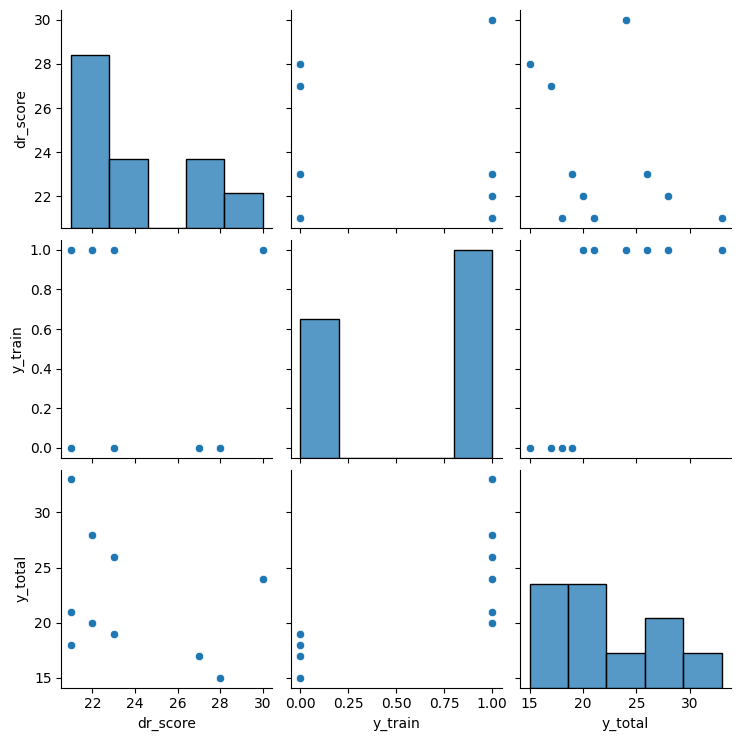

In [149]:
sns.pairplot(data=over_score[['dr_score','y_train','y_total']])


<Axes: >

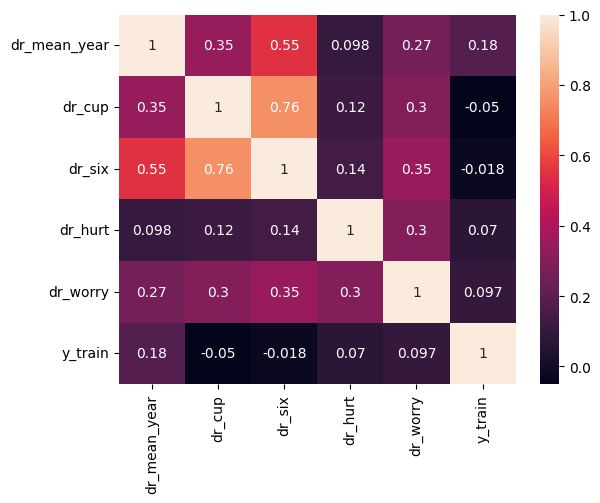

In [150]:
sns.heatmap(data=new_df[['dr_mean_year', 'dr_cup', 'dr_six', 'dr_hurt', 'dr_worry','y_train']].corr(),annot=True,cbar=True)


<Axes: >

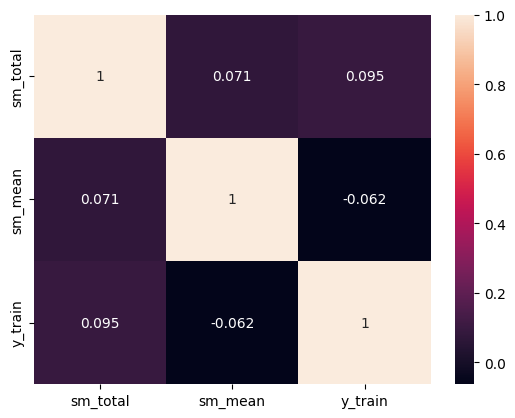

In [151]:
sns.heatmap(data=new_df[['sm_total','sm_mean','y_train']].corr(),annot=True,cbar=True)

In [152]:
new_df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'gen', 'age', 'rel', 'edu', 'edu_rate', 'sm_total', 'sm_state',
       'sm_mean', 'dr_mean_year', 'dr_cup', 'dr_six', 'dr_hurt', 'dr_worry',
       'preg', 'income_bal', 'heal_state', 'disabled', 'work_state',
       'work_code', 'dr1', 'dr2', 'dr3', 'dr4', 'dr5', 'dr6', 'dr7', 'y_total',
       'y_train', 'dr_score'],
      dtype='object')

<Axes: >

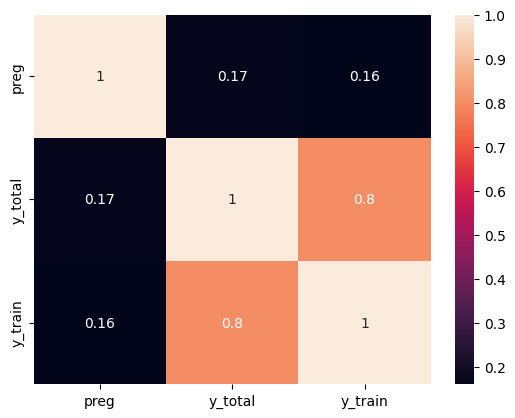

In [153]:
sns.heatmap(data=new_df[['preg','y_total','y_train']].corr(),annot=True,cbar=True)

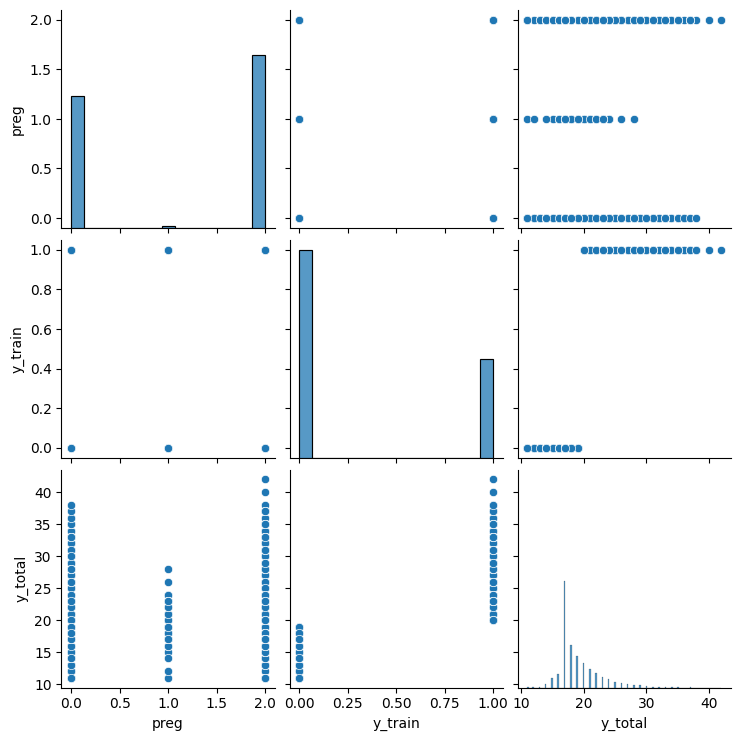

In [154]:
sns.pairplot(data=new_df[['preg','y_train','y_total']])


In [155]:
woman_df = new_df.loc[new_df['preg']>0,:]


In [156]:
woman_df_preg = woman_df.loc[woman_df['preg']==1]["y_total"].describe()
woman_df_preg

count    86.000000
mean     18.558140
std       2.632845
min      11.000000
25%      17.000000
50%      18.000000
75%      20.000000
max      28.000000
Name: y_total, dtype: float64

In [157]:
woman_df_none = woman_df.loc[woman_df['preg']==2]["y_total"].describe()
woman_df_none

count    7595.000000
mean       19.540092
std         3.425196
min        11.000000
25%        17.000000
50%        18.000000
75%        21.000000
max        42.000000
Name: y_total, dtype: float64

<Axes: >

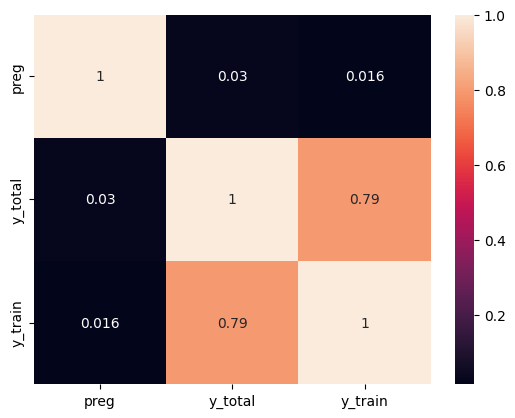

In [158]:
sns.heatmap(data=woman_df[['preg','y_total','y_train']].corr(),annot=True,cbar=True)

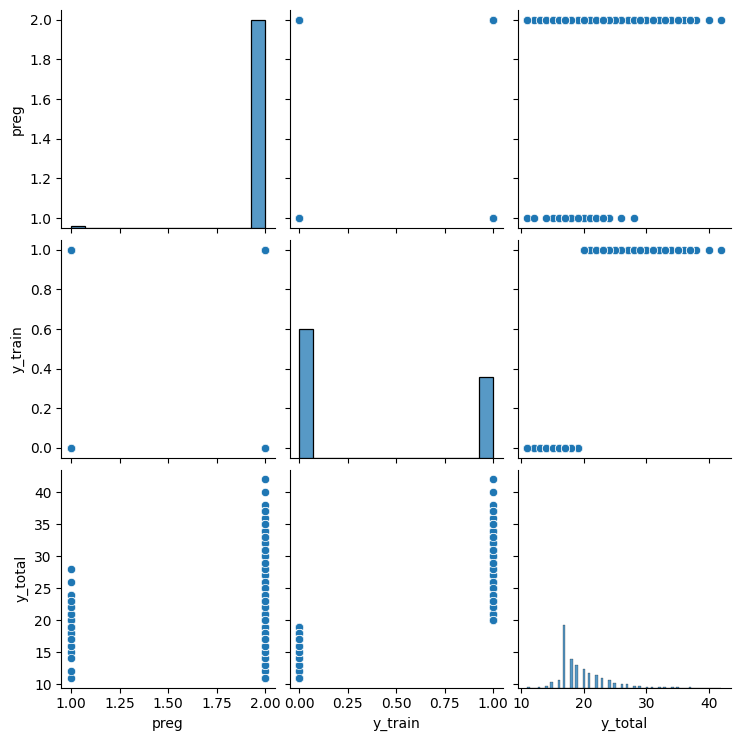

In [159]:
sns.pairplot(data=woman_df[['preg','y_train','y_total']])

In [160]:
new_df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'gen', 'age', 'rel', 'edu', 'edu_rate', 'sm_total', 'sm_state',
       'sm_mean', 'dr_mean_year', 'dr_cup', 'dr_six', 'dr_hurt', 'dr_worry',
       'preg', 'income_bal', 'heal_state', 'disabled', 'work_state',
       'work_code', 'dr1', 'dr2', 'dr3', 'dr4', 'dr5', 'dr6', 'dr7', 'y_total',
       'y_train', 'dr_score'],
      dtype='object')

"1. 임금근로자                    2. 자영업, 고용주 
3. 무급 가족 종사자            4. 미취업자(근로능력있음)                                                  5. 미취업자(근로능력없음)"


In [161]:
new_df['work_state'].unique()

array([4., 1., 2., 3., 5.])

In [162]:
## 0 과 1 로 나눔
## 핀트는 일을하는사람과 안하는 사람의 차이를 보기 위함임
## 일하는 사람 1 안하는 사람  0

new_df.loc[new_df['work_state']<=3,'work_state'] = 1
new_df.loc[new_df['work_state']>3,'work_state'] = 0
new_df['work_state'].value_counts()

work_state
1.0    8058
0.0    5414
Name: count, dtype: int64

<Axes: >

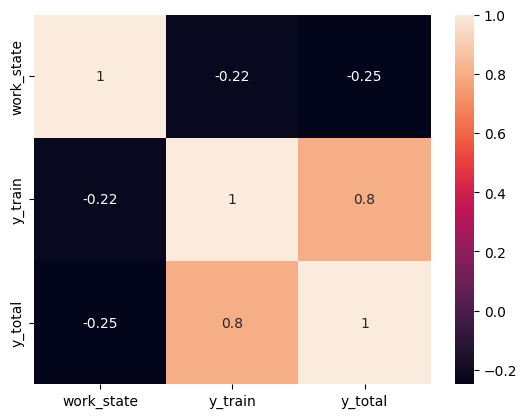

In [165]:
sns.heatmap(data=new_df[['work_state','y_train','y_total']].corr(),annot=True,cbar=True)

In [166]:
new_df['disabled'].value_counts()

disabled
0     12185
1       701
4       203
3       150
9        55
2        49
16       46
8        29
6        24
14        8
11        7
15        4
5         4
12        3
10        3
13        1
Name: count, dtype: int64

In [178]:
new_df['preg'].value_counts()

preg
2.0    7595
0.0    5791
1.0      86
Name: count, dtype: int64

In [167]:

new_df.loc[new_df['disabled']!=0,'disabled'] = 1
new_df['disabled'].value_counts()

disabled
0    12185
1     1287
Name: count, dtype: int64

In [173]:
able = new_df.loc[new_df['disabled']==0,:].sample(1000,random_state=5)
disable = new_df.loc[new_df['disabled']==1,:].sample(1000,random_state=5)
concat = pd.concat([able,disable])
concat


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,dr1,dr2,dr3,dr4,dr5,dr6,dr7,y_total,y_train,dr_score
11070,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0,0,7.0
6473,1.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,0,NaN
15705,2.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1,NaN
8535,2.0,3.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,1,NaN
5289,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,2.0,4.0,1.0,2.0,3.0,3.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,1,NaN
8,2.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,1,NaN
7979,3.0,3.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,1,NaN
12163,3.0,3.0,2.0,2.0,3.0,2.0,4.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,1,NaN


<Axes: >

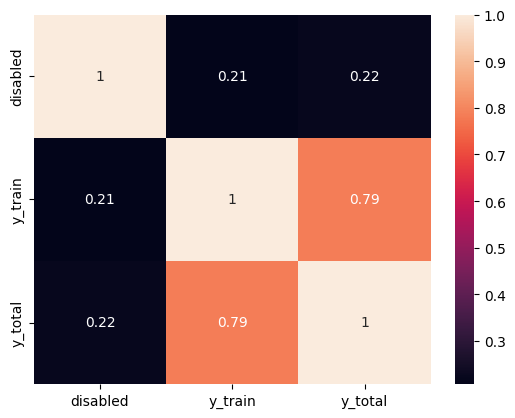

In [175]:
sns.heatmap(data=concat[['disabled','y_train','y_total']].corr(),annot=True,cbar=True)

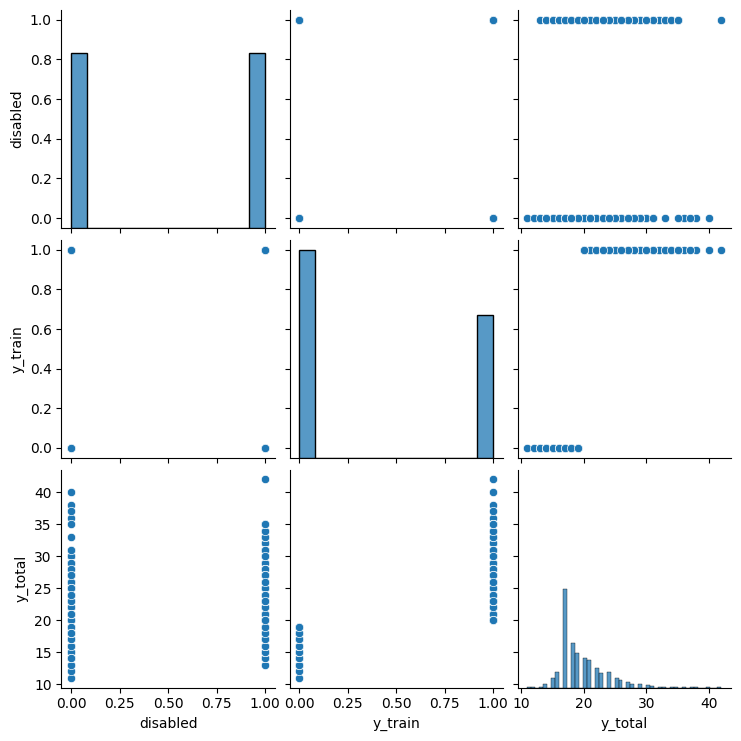

In [177]:

sns.pairplot(data=concat[['disabled','y_train','y_total']])


In [169]:
new_df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'gen', 'age', 'rel', 'edu', 'edu_rate', 'sm_total', 'sm_state',
       'sm_mean', 'dr_mean_year', 'dr_cup', 'dr_six', 'dr_hurt', 'dr_worry',
       'preg', 'income_bal', 'heal_state', 'disabled', 'work_state',
       'work_code', 'dr1', 'dr2', 'dr3', 'dr4', 'dr5', 'dr6', 'dr7', 'y_total',
       'y_train', 'dr_score'],
      dtype='object')

In [179]:
new_df['income_bal'].value_counts()


income_bal
1    8863
2    4609
Name: count, dtype: int64

In [181]:
new_df['preg'].value_counts()

preg
2.0    7595
0.0    5791
1.0      86
Name: count, dtype: int64

<Axes: >

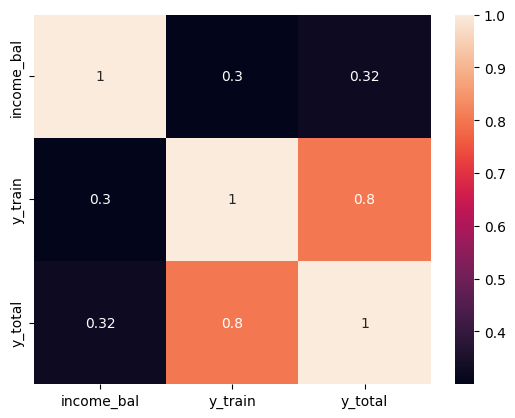

In [180]:
sns.heatmap(data=new_df[['income_bal','y_train','y_total']].corr(),annot=True,cbar=True)

In [61]:
복지패널데이터에서 
예를 30점인사람 의 빙ㄹ
33점
1~20
20~30
우울감의 기준 16점이면 -> 위인사람을 나눈거랑
통계청데이터에서 우울감을 느끼는 사람의 비율을 비교

디테일 도시인사람들이 비율을 복지패널이랑 통계청에서랑 비교해도되고
회귀분석-> 로짙스틱
0 1이랑 나눠서 극거를 통꼐청데이터 

SyntaxError: invalid decimal literal (1279624385.py, line 2)

In [184]:
new_df['Q10'].unique()

array([1., 2., 3., 4.])